In [1]:
from model import SugarscapeCg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 20})

## Helper functions

In [2]:
def run_model(model):
    model.run_model()

    output = model.datacollector.get_model_vars_dataframe()
    print(output)

    return output

In [3]:
def get_data(df, key):
    all_rows = df[0][key].values

    for i in range(1, len(df)):
        wealths = df[i][key].values
        all_rows = np.vstack([all_rows, wealths])

    all_rows = all_rows.T

    return all_rows

In [4]:
def get_means_cis(data):
    means = []
    cis = []

    for i in range(data.shape[0]):
        means.append(np.mean(data[i]))
        cis.append(1.96*np.std(data[i])/np.sqrt(data.shape[0]))

    return means, cis

In [5]:
def get_average_crime_per_distr(outputs, district_names, burn_in):
    avg_crimes_per_distr_dict = {'Centrum': 0, 'Nieuw-West': 0, 'Noord': 0, 'Oost': 0, 'West': 0, 'Zuid': 0, 'Zuidoost': 0} 
    for i in range(len(outputs)):
        for district in district_names:
            avg_crimes_per_distr_dict[district] += np.mean(outputs[i].iloc[burn_in:][district])
    for district in district_names:
        avg_crimes_per_distr_dict[district] /= len(outputs)
    return dict(sorted(avg_crimes_per_distr_dict.items(), key=lambda item:item[1]))

## Plotting functions

In [6]:
def plot_errorbars(means, cis, y_axis_label):
    plt.errorbar(x=range(len(means)), y=means, yerr=cis, ecolor='red')
    plt.xlabel("Number of steps")
    plt.ylabel(y_axis_label)

In [7]:
def plot_district_crimes(district_means, district_cis, district_names, district_colors):
    for district_index in range(len(district_means)):
        plt.errorbar(x=range(len(district_means[district_index])), y=district_means[district_index], yerr=district_cis[district_index], label=district_names[district_index], color=district_colors[district_index], ecolor=district_colors[district_index])
        plt.xlabel("Number of steps")
        plt.ylabel('Number of crimes')
    plt.legend()

In [8]:
# def plot_district_crimes_bar(district_means, district_cis, district_names, district_colors):
#     plt.bar(np.arange(len(district_means)), height=district_means, yerr=district_cis, color=district_colors, capsize=10)
#     plt.xticks(np.arange(len(district_means)), district_names)
#     # plt.xlabel("Number of steps")
#     plt.ylabel('Number of crimes')

In [9]:
def plot_district_means_bar(avg_crimes_per_distr_dict, district_colors):
    plt.bar(avg_crimes_per_distr_dict.keys(), avg_crimes_per_distr_dict.values(), color=district_colors)
    plt.legend()
    plt.show()
    return

## Run model

In [10]:
num_runs = 2
outputs = []

for run in range(num_runs):
    m = SugarscapeCg(criminal_risk_radius=5, cop_catch_radius=1)
    print(f"Search radius for criminal is :{m.criminal_risk_radius}", "\n", f"Catch radius is :{m.cop_catch_radius}")
    output = run_model(m)
    outputs.append(output)

Search radius for criminal is :5 
 Catch radius is :1
Initial number Sugarscape Agent:  691
[1, 444.0]
[2, 201.0]
[3, -48.0]
[4, -438.0]
[5, -501.0]
[6, -593.0]
[7, -884.0]
[8, -999.0]
[9, -1068.0]
[10, -1249.0]
[11, -1322.0]
[12, -1485.0]
[13, -1448.0]
[14, -1542.0]
[15, -1519.0]
[16, -1581.0]
[17, -1792.0]
[18, -2026.0]
[19, -2291.0]
[20, -2561.0]
[21, -2879.0]
[22, -2831.0]
[23, -3036.0]
[24, -3337.0]
[25, -3525.0]
[26, -3766.0]
[27, -3888.0]
[28, -3949.0]
[29, -4045.0]
[30, -4056.0]
[31, -4086.0]
[32, -4074.0]
[33, -4111.0]
[34, -3980.0]
[35, -3996.0]
[36, -3779.0]
[37, -3542.0]
[38, -3428.0]
[39, -3402.0]
[40, -3420.0]
[41, -3266.0]
[42, -3225.0]
[43, -2976.0]
[44, -2714.0]
[45, -2443.0]
[46, -2100.0]
[47, -1852.0]
[48, -1545.0]
[49, -1331.0]
[50, -1064.0]
[51, -683.0]
[52, -657.0]
[53, -462.0]
[54, -397.0]
[55, -303.0]
[56, -229.0]
[57, -25.0]
[58, 216.0]
[59, 298.0]
[60, 546.0]
[61, 766.0]
[62, 975.0]
[63, 1402.0]
[64, 1717.0]
[65, 2008.0]
[66, 2147.0]
[67, 2465.0]
[68, 2497.0]


In [11]:
print(np.mean(outputs[1]["Zuid"]), np.mean(outputs[1]["Centrum"]))

5.016611295681063 3.823920265780731


## Plots

### Criminal wealths

In [12]:
all_wealths = get_data(outputs, 'Criminal Wealth')

# print(all_wealths[0])
print(all_wealths.shape)

(301, 2)


In [13]:
mean_wealths, cis_wealths = get_means_cis(all_wealths)

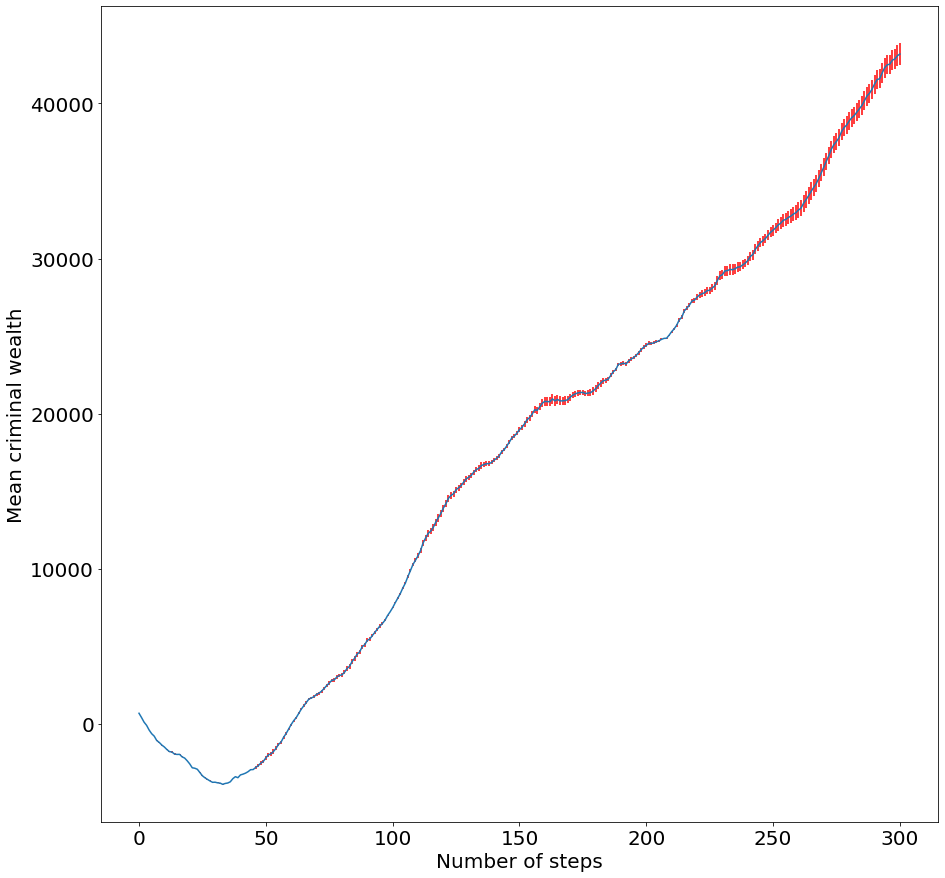

In [14]:
plot_errorbars(mean_wealths, cis_wealths, "Mean criminal wealth")

### Criminals in jail

In [15]:
jail_count = get_data(outputs, 'Criminal in Jail Count')

print(jail_count.shape)

(301, 2)


In [16]:
mean_jail_count, cis_jail_count = get_means_cis(jail_count)

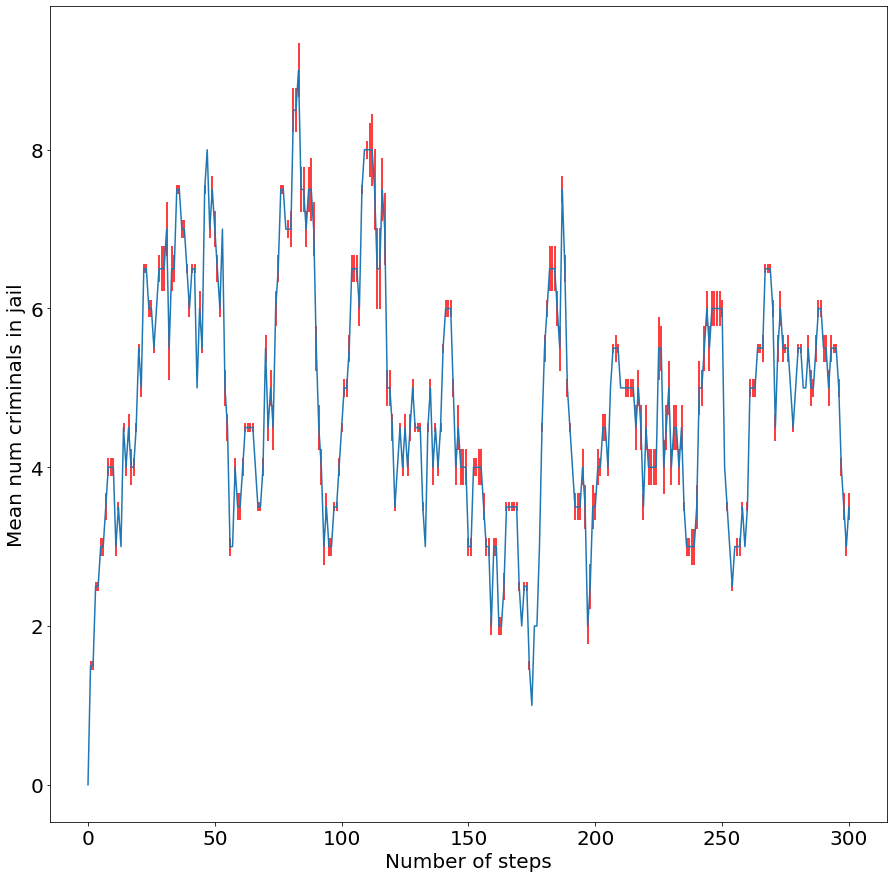

In [17]:
plot_errorbars(mean_jail_count, cis_jail_count, "Mean num criminals in jail")

### Crimes committed

In [18]:
crimes_count = get_data(outputs, 'Crimes commited')

print(crimes_count.shape)

(301, 2)


In [19]:
mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)

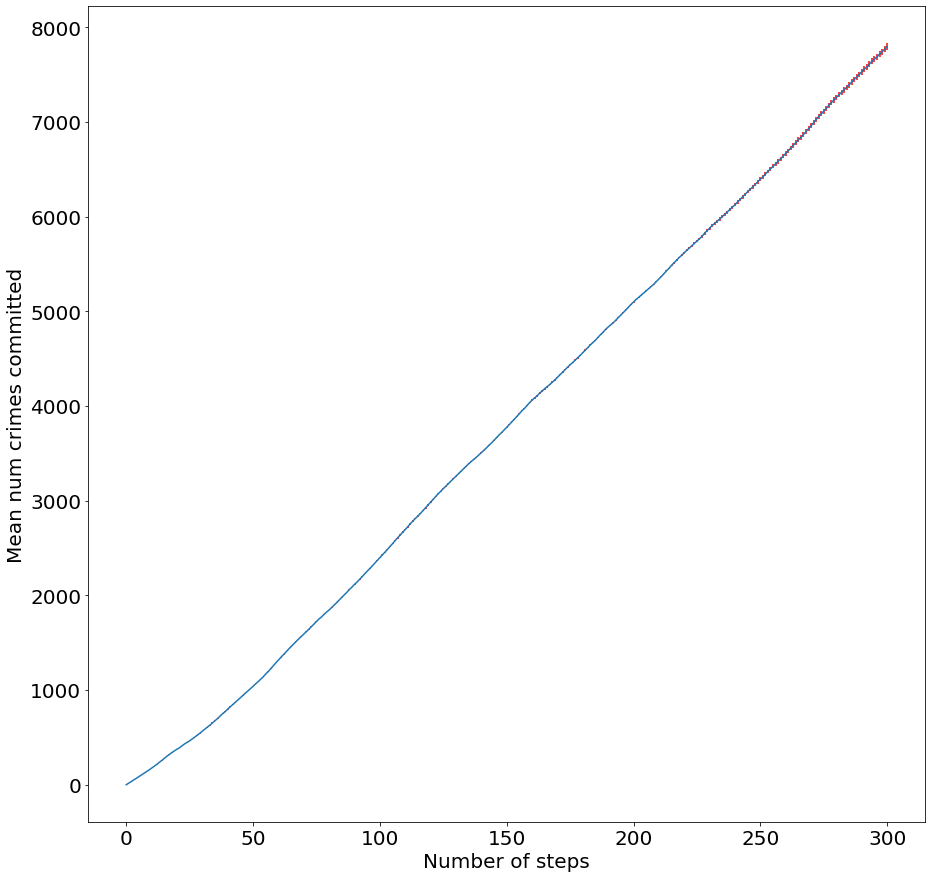

In [20]:
plot_errorbars(mean_crimes_count, cis_crimes_count, "Mean num crimes committed")

### District crimes

No handles with labels found to put in legend.


Zuidoost
West
Noord
Oost
Centrum
Zuid
Nieuw-West


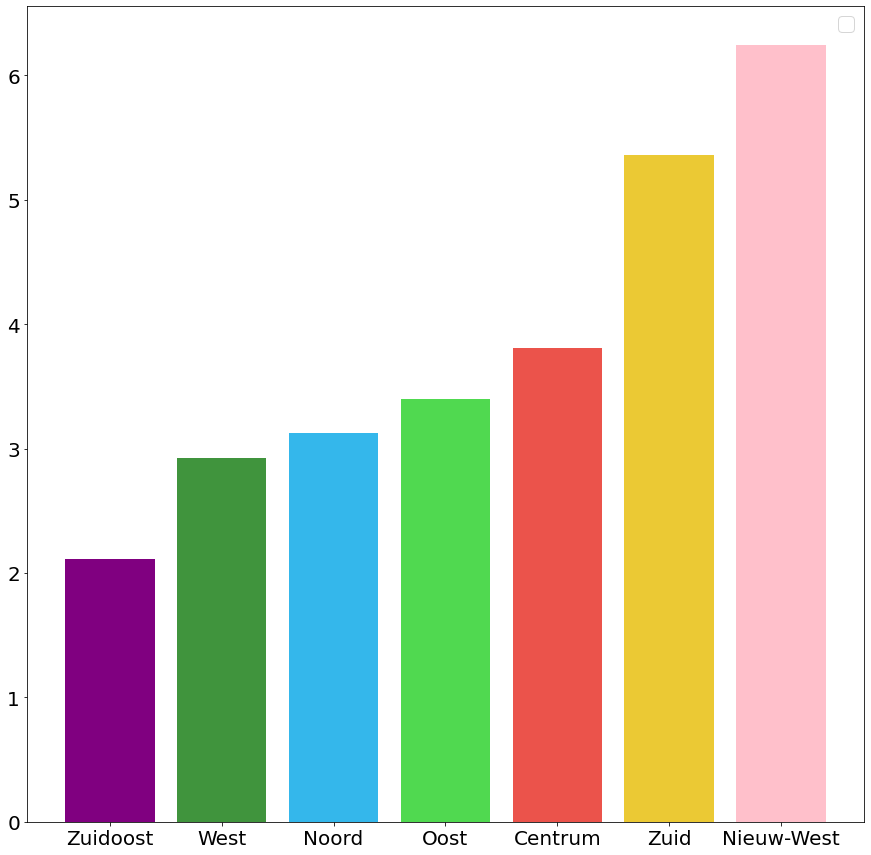

In [21]:
district_names = ['Centrum', 'Noord', 'West', 'Zuid', 'Zuidoost', 'Oost', 'Nieuw-West']
# district_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']
# district_colors = ['#eb534b', '#34b7eb', '#40943d', '#ebc934', '#800080', '#50d950', '#ffc0cb']

districts_dict = [{"Label": "Centrum", "Color": "#eb534b"},{"Label": "Noord", "Color": "#34b7eb"},{"Label": "West", "Color": "#40943d"},{"Label": "Nieuw-West", "Color": "#ffc0cb"},{"Label": "Zuid", "Color": "#ebc934"},{"Label": "Oost", "Color": "#50d950"},{"Label": "Zuidoost", "Color": "#800080"}]

avg_crimes_per_distr_dict = get_average_crime_per_distr(outputs, district_names, 200)

# Sort colors
district_colors = []
for district in avg_crimes_per_distr_dict.keys():
    print(district)
    for dictionary in districts_dict:
        if dictionary['Label'] == district:
            district_colors.append(dictionary['Color'])

plot_district_means_bar(avg_crimes_per_distr_dict, district_colors)

In [22]:
all_district_means = []
all_district_cis = []

for district in district_names:
    crimes_count = get_data(outputs, district)
    mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)
    all_district_means.append(mean_crimes_count)
    all_district_cis.append(cis_crimes_count)

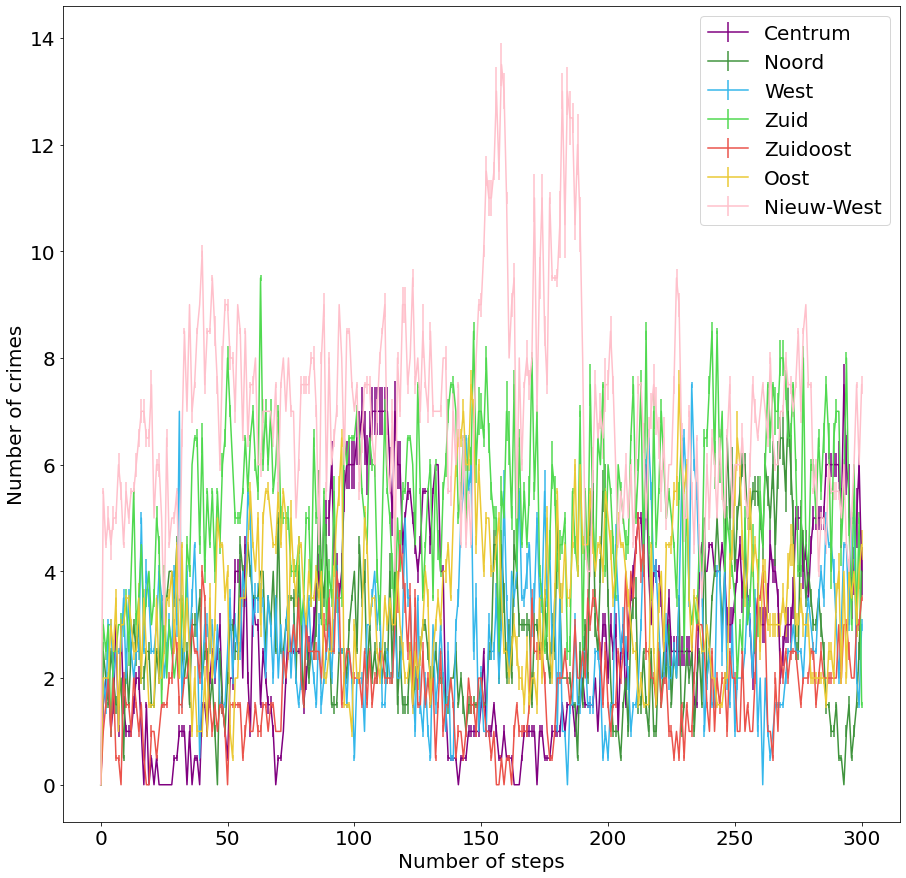

In [23]:
plot_district_crimes(all_district_means, all_district_cis, district_names, district_colors)

In [24]:
# print(len(all_district_means))
# print(len(all_district_means[0]))

# final_district_means = []
# for district in all_district_means:
#     final_district_means.append(district[-1])

# print(final_district_means)

# final_district_cis = []
# for district in all_district_cis:
#     final_district_cis.append(district[-1])

# print(final_district_cis)

In [25]:
# # Sort by size
# sorting = zip(final_district_means, district_names, district_colors)
# final_district_means, district_names, district_colors = zip(*sorted(sorting, key=lambda x : x[0]))

In [26]:
# plot_district_crimes_bar(final_district_means, final_district_cis, district_names, district_colors)